In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

from xgboost import XGBRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
XGB = XGBRegressor()

In [6]:
XGB.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [7]:
XGB.score(X,y)

0.9982419982252098

In [8]:
explainer = shap.TreeExplainer(XGB)

In [9]:
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [10]:
len(shap_values)

2580

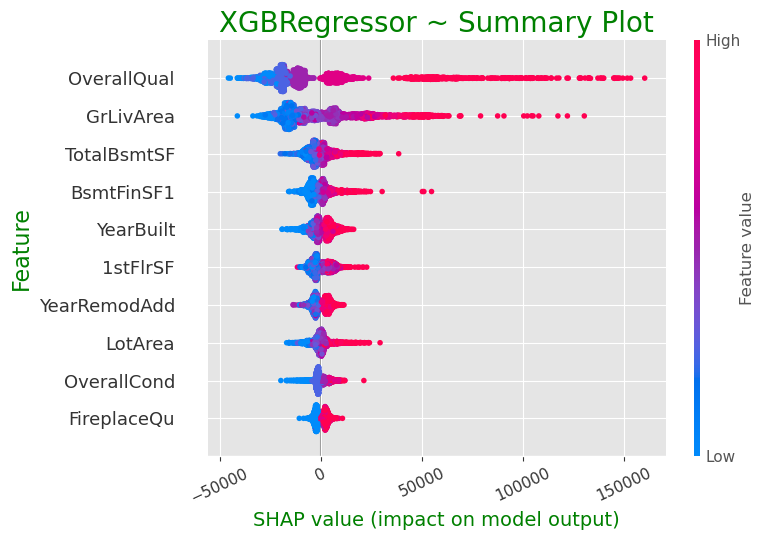

In [11]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=10)
plt.title('XGBRegressor ~ Summary Plot', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

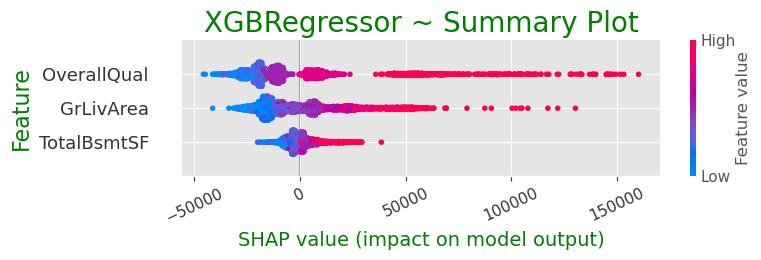

In [12]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=3)
plt.title('XGBRegressor ~ Summary Plot', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


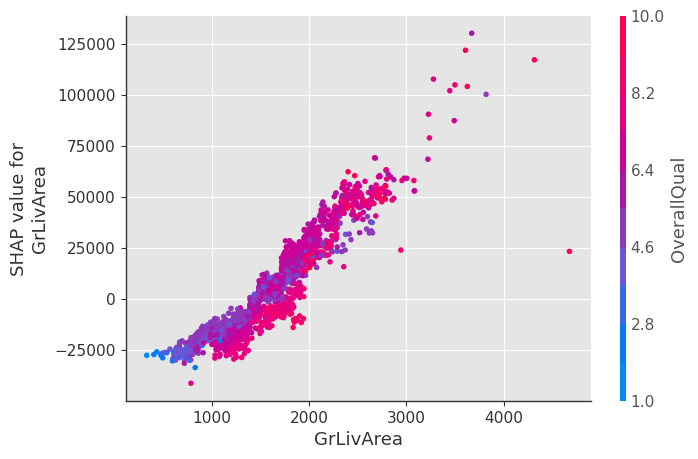

In [13]:
shap.dependence_plot("GrLivArea", shap_values, X)

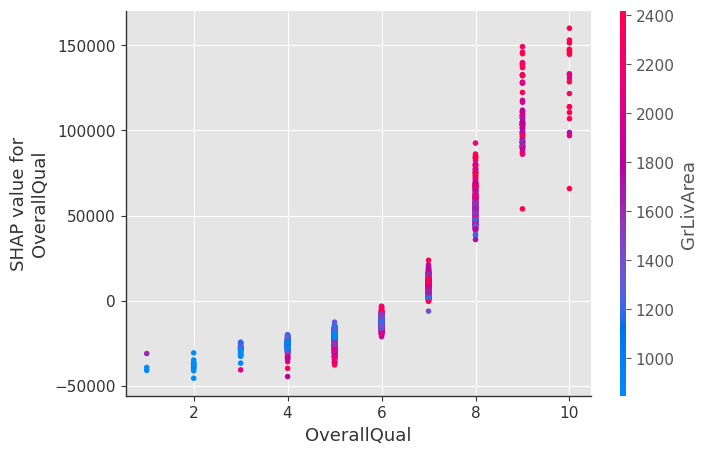

In [14]:
shap.dependence_plot("OverallQual", shap_values, X)